# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 14 ноября 2023 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

1) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
N = 500
loc = 2
scale = 1
norm_sample = sps.norm.rvs(size=N, loc=loc, scale=scale)
norm_col = 'blue'
laplace_sample = sps.laplace.rvs(size=N, loc=loc, scale=scale)
lap_col = 'red'
cauchy_sample = sps.cauchy.rvs(size=N, loc=loc, scale=scale)
cau_col = 'green'

2) Постройте график плотности распределения для всех трех распределений на одних осях.

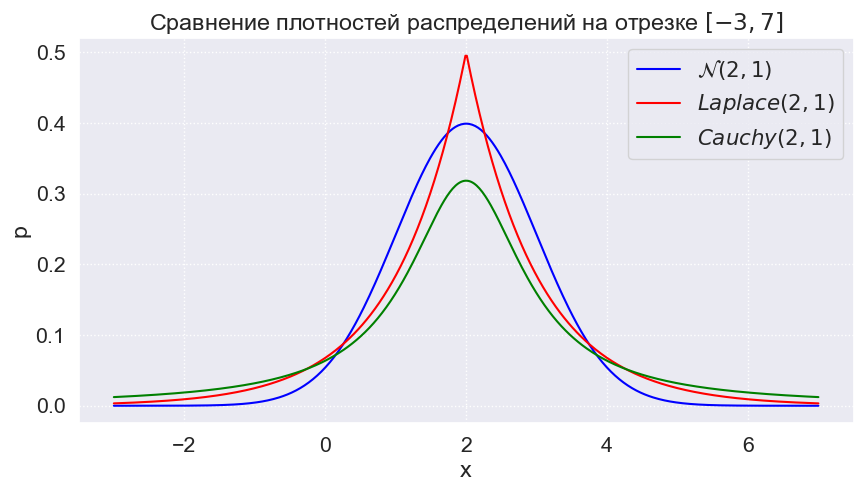

In [3]:
n = 5
grid = np.linspace(loc-n, loc+n, N)
plt.figure(figsize=(10, 5))
plt.plot(grid, sps.norm.pdf(grid, loc=loc, scale=scale), color=norm_col, label='$\mathcal{N}(%.0f,%.0f)$' %(loc, scale))
plt.plot(grid, sps.laplace.pdf(grid, loc=loc, scale=scale), color=lap_col, label='$Laplace(%.0f,%.0f)$' %(loc, scale))
plt.plot(grid, sps.cauchy.pdf(grid, loc=loc, scale=scale), color=cau_col, label='$Cauchy(%.0f,%.0f)$' %(loc, scale))
plt.xlabel('x')
plt.ylabel('p')
plt.legend(loc='upper right')
plt.title('Сравнение плотностей распределений на отрезке $[%.0f,%.0f]$' %(loc-n, loc+n))
plt.grid(ls=':')

1) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

$\usepackage[english, russian]{babel}$
$\usepackage{amsfonts}$
$\usepackage{amsmath}$
$\usepackage{amssymb}$
$\usepackage{amsthm}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\le}{\ \leqslant\ }$
$\newcommand{\ge}{\ \geqslant\ }$
$\newcommand{\d}{\partial}$
$\newcommand{\grad}{\nabla}$
$\newcommand{\l}{\left}$
$\newcommand{\r}{\right}$
$\renewcommand{\la}{\langle}$
$\renewcommand{\ra}{\rangle}$

### Теория
Теореме о выборочном квантиле:
$$\sqrt{n}(z_{n, p} - z_p) \stackrel{d}{\to} \mathcal{N}\l(0, \dfrac{p(1-p)}{p^2(z_p)}\r)$$

Для выборочной медианы $\l(\frac{1}{2} - \text{ квантиль}\r)$  имеем
$$\sqrt{n}(\widehat{\mu} - z_{\frac{1}{2}}) \stackrel{d}{\to} \mathcal{N}\l(0, \dfrac{1}{4p^2(z_{\frac{1}{2}})}\r)$$

ЦПТ:
$$\sqrt{n}\l(\overline{X} - \mu\r) \stackrel{d}{\to} \mathcal{N}\l(0, \sigma^2\r)$$


1) Для выборки из распределения $\mathcal{N}(\theta, \sigma^2)$ 
$$p(x) = \dfrac{1}{\sigma \sqrt{2\pi}} exp\l[{-\dfrac{1}{2}\l(\dfrac{x-\theta}{\sigma}\r)^2}\r] \hspace{1cm} EX = \theta \hspace{1cm} X_{\l(\lfloor\frac{n}{2}\rfloor\r)} = \theta \hspace{1cm} DX=\sigma^2$$
Для оценки $\theta^* = \overline{X}$ из ЦПТ имеем
$$\sqrt{n}(\overline{X} - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, \sigma^2\r)$$
Значит, асимптотическая дисперсия равна $\sigma^2$.

А для оценки $\theta^* = \widehat{\mu}$ из теоремы о выборочном квантиле имеем
$$\sqrt{n}(\widehat{\mu} - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, \dfrac{\pi \sigma^2}{2}\r)$$
То есть асимптотическая дисперсия равна $\dfrac{\pi \sigma^2}{2} > \sigma^2$
Итого, оценка $\theta^* = \overline{X}$ лучше $\theta^* = \widehat{\mu}$ в асимптотическом подходе.

2) Для выборки из распределения $Laplace(\theta, \sigma)$ 
$$p(x) = \dfrac{1}{2\sigma} exp\l[{-\dfrac{|x - \theta|}{\sigma}}\r] \hspace{1cm} EX = \theta \hspace{1cm} X_{\l(\lfloor\frac{n}{2}\rfloor\r)} = \theta \hspace{1cm} DX=2\sigma^2$$
Для оценки $\overline{X}$ из ЦПТ имеем
$$\sqrt{n}(\overline{X} - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, 2\sigma^2\r)$$
Значит, асимптотическая дисперсия равна $2\sigma^2$.

А для оценки $\widehat{\mu}$ из теоремы о выборочном квантиле  имеем
$$\sqrt{n}(\widehat{\mu} - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, \sigma^2\r)$$
То есть асимптотическая дисперсия равна $\sigma^2 < 2\sigma^2$
Итого, оценка $\theta^* = \widehat{\mu}$ лучше $\theta^* = \overline{X}$ в асимптотическом подходе.

3) Для выборки из распределения $Cauchy(\theta, \sigma)$
$$p(x) = \dfrac{1}{\pi \sigma \l[1 + \l(\dfrac{x - \theta}{\sigma}\r)^2\r]} \hspace{1cm} EX = +\infty \hspace{1cm} X_{\l(\lfloor\frac{n}{2}\rfloor\r)} = \theta \hspace{1cm} DX = +\infty $$
ЦПТ применить мы не можем. Да и вообще, учитывая, что матожидание бесконечно, надеяться на адекватные результаты о такой оценке не станем (увидим экспериментально, что мы верно поступили). Для оценки $\theta^* = \overline{X}$ не имеем ничего определённого. 

А для оценки  $\theta^* = \widehat{\mu}$  из теоремы о выборочном квантиле  имеем
$$\sqrt{n}(\widehat{\mu} - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, \dfrac{\pi^2 \sigma^2}{4}\r)$$
То есть асимптотическая дисперсия равна $\dfrac{\pi^2 \sigma^2}{4}$
Итого, оценка $\theta^* = \widehat{\mu}$ лучше $\theta^* = \overline{X}$ в асимптотическом подходе.

### Практика

In [4]:
def MSE(a, b):
    return (b - a)**2

In [5]:
from IPython.display import display, Latex

theta = loc
sigma = scale

def sample_info(distribution, sample):
    print(distribution + ':\n')
    sample_mean = np.mean(sample)
    sample_median = np.median(sample)
    mean_mse = MSE(loc, sample_mean)
    median_mse = MSE(loc, sample_median)
    display(Latex('$\\theta = %.4f \hspace{1cm} \overline{X} = %.4f \hspace{1cm} \widehat{\mu} = %.4f \hspace{1cm} \\text{MSE for mean: } %.4f \hspace{1cm} \\text{MSE for median: } %.4f  $' %(theta, sample_mean, sample_median, mean_mse, median_mse)))
    
sample_info('Normal', norm_sample)
sample_info('Laplace', laplace_sample)
sample_info('Cauchy', cauchy_sample)

Normal:


<IPython.core.display.Latex object>

Laplace:


<IPython.core.display.Latex object>

Cauchy:


<IPython.core.display.Latex object>

Всё так, как мы и полагали: в случае нормального распределения оценка параметра сдвига выборочным средним $\overline{X}$ лучше оценки выборочной медианой $\widehat{\mu}$, а применительно к распределениям Лапласа и Коши всё наоборот. Причём в случае распределения Коши превосходство оценки медианой особенно заметно (в прочем, этого мы и ожидали).

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [6]:
import math

def truncated_mean(sample, alpha=0.3):
  sorted_sample = sorted(sample)
  size = len(sorted_sample)
  sorted_sample = sorted_sample[int(alpha * size) : int((1 - alpha) * size)]
  trunc_mean = np.mean(sorted_sample)
  return trunc_mean

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

In [7]:
min_num = 100


def MSE_for_truncated_mean(sample, alpha):
    mse = []
    for k in range(min_num, N):
        mse.append(MSE(truncated_mean(sample[:k], alpha), theta))
    return mse


alphas = [0.1, 0.2, 0.3]
distributions_names = ["Normal", "Laplace", "Cauchy"]
colors = [norm_col, lap_col, cau_col]
samples = [norm_sample, laplace_sample, cauchy_sample]

Сперва, посмотрим на графики полученных точностей оценок по-отдельности:

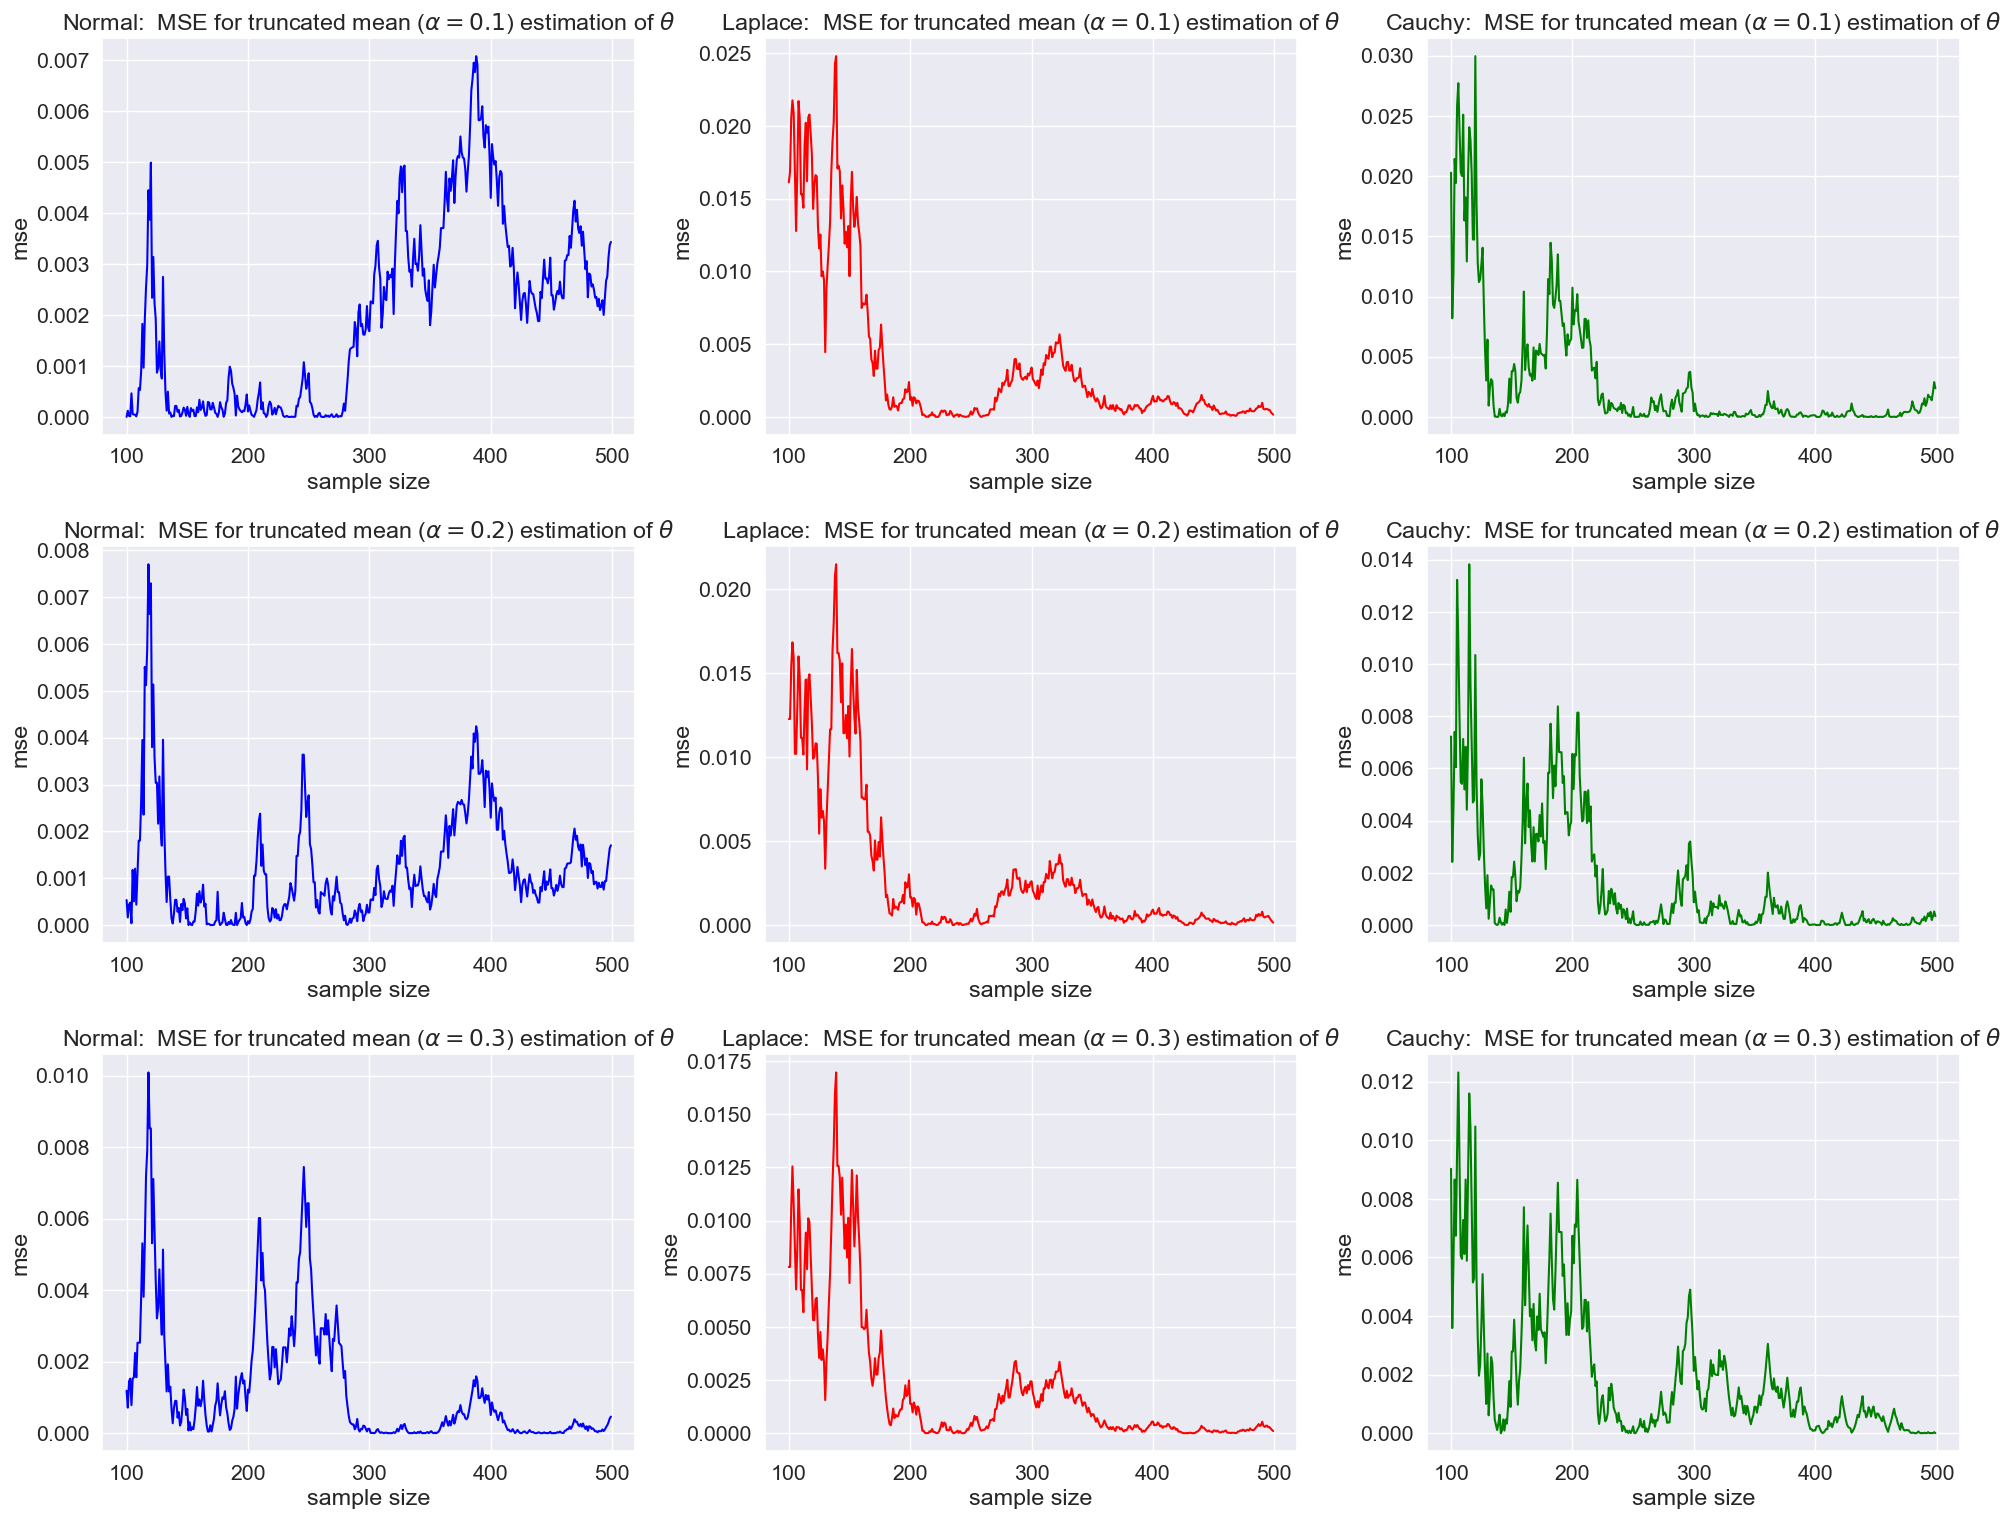

In [8]:
fig = plt.figure(figsize=(20, 20))
plot_number = 1

for a in range(len(alphas)):
    alpha = alphas[a]
    for d in range(len(distributions_names)):
        distribution_name = distributions_names[d]
        sample = samples[d]
        color = colors[d]
        ax = fig.add_subplot(4, 3, plot_number) # plot with 4 rows and 3 columns
        plot_number += 1
        ax.plot(range(min_num, N), MSE_for_truncated_mean(sample, alpha), color=color)
        ax.set_title(distribution_name + ":  MSE for truncated mean ($\\alpha = %.1f$) estimation of $\\theta$" % alpha)
        ax.set_xlabel('sample size')
        ax.set_ylabel('mse')

# add spacing between subplots
fig.tight_layout()
plt.show()

Теперь, как просят в задании:

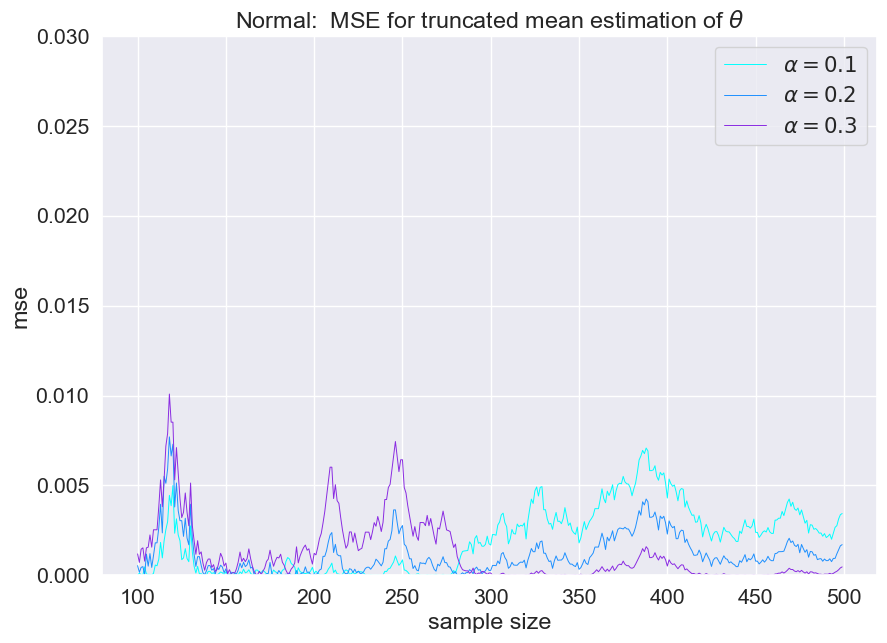

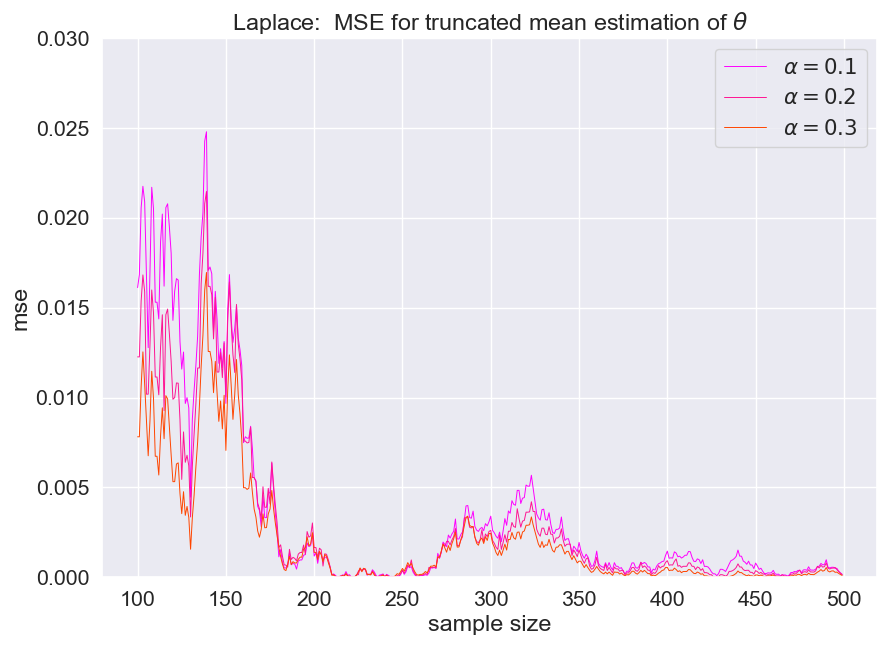

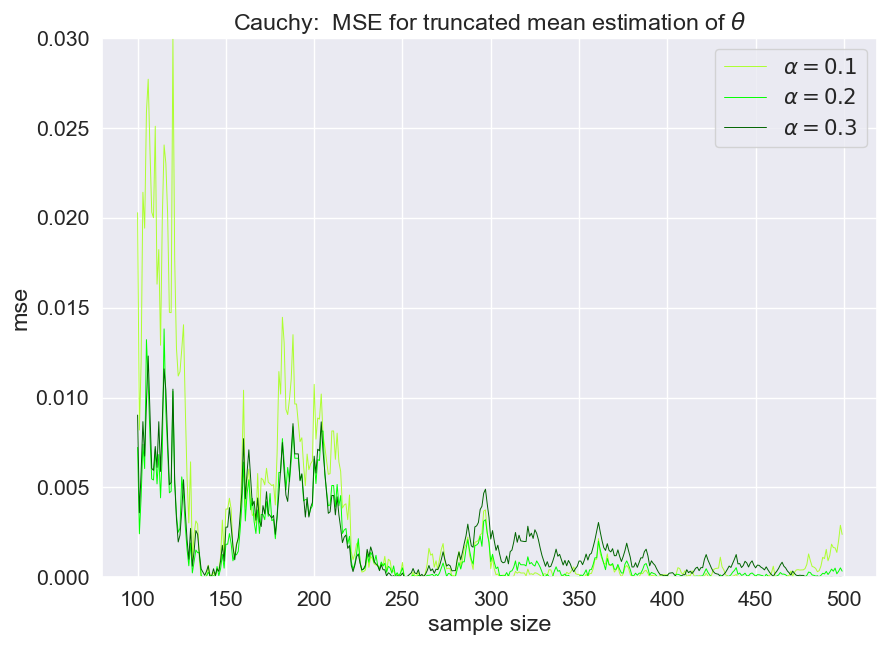

In [9]:
new_colors = [['aqua', 'dodgerblue', 'blueviolet'], 
              ['fuchsia', 'deeppink', 'orangered'],
              ['greenyellow', 'lime', 'darkgreen']]
for d in range(len(distributions_names)):
    distribution_name = distributions_names[d]
    sample = samples[d]
    fig = plt.figure(figsize=(10, 7))
    for a in range(len(alphas)):
        alpha = alphas[a]
        color = new_colors[d][a]
        plt.plot(range(min_num, N), MSE_for_truncated_mean(sample, alpha), alpha=1, linewidth=0.7, color=color, label='$\\alpha = %.1f$' %alpha)
    plt.legend()
    plt.ylim(0, 0.03)
    plt.title(distribution_name + ":  MSE for truncated mean estimation of $\\theta$")
    plt.xlabel('sample size')
    plt.ylabel('mse')
plt.show()

Во-первых, конечно же, с ростом выборки точность оценки повышается.
Во-вторых, видим, что с увеличением $\alpha$ точность повышается для распределений Лапласа и Коши, а для нормального распределения напротив понижается. (Во всяком случае, для выборок размера $\le 250$).
Как мы видим, точнее всего оценка усечённого среднего подходит для распределения Лапласа. 
Для нормального распределения точность немного хуже.
А вот распределение Коши по сравнению с ними даёт очень малую точность (MSE очень велика).

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

Ещё раз выпишем плотности, ведь $dF(x) = p(x)dx$
 
$$\mathcal{N}(\theta, \sigma^2) \hspace{3cm} p(x) = \dfrac{1}{\sigma \sqrt{2\pi}} exp\l[{-\dfrac{1}{2}\l(\dfrac{x-\theta}{\sigma}\r)^2}\r]$$

$$Laplace(\theta, \sigma) \hspace{3cm} p(x) = \dfrac{1}{2\sigma} exp\l[{-\dfrac{|x - \theta|}{\sigma}}\r]$$

$$Cauchy(\theta, \sigma) \hspace{3cm} p(x) = \dfrac{1}{\pi \sigma \l[1 + \l(\dfrac{x - \theta}{\sigma}\r)^2\r]}$$



In [10]:
from scipy.integrate import quad

def f(x, distribution):
    return distribution.pdf(x) * np.power(x,2)

def asymptotic_variance(distribution, alpha_grid):
    var = []
    for alpha in alpha_grid:
        u = distribution.ppf(1 - alpha) # 1-a quantile
        I = quad(f, 0, u, args=distribution)[0]
        var.append(2 * (I + alpha * np.power(u,2)) / np.power((1 - 2*alpha),2))
    return var

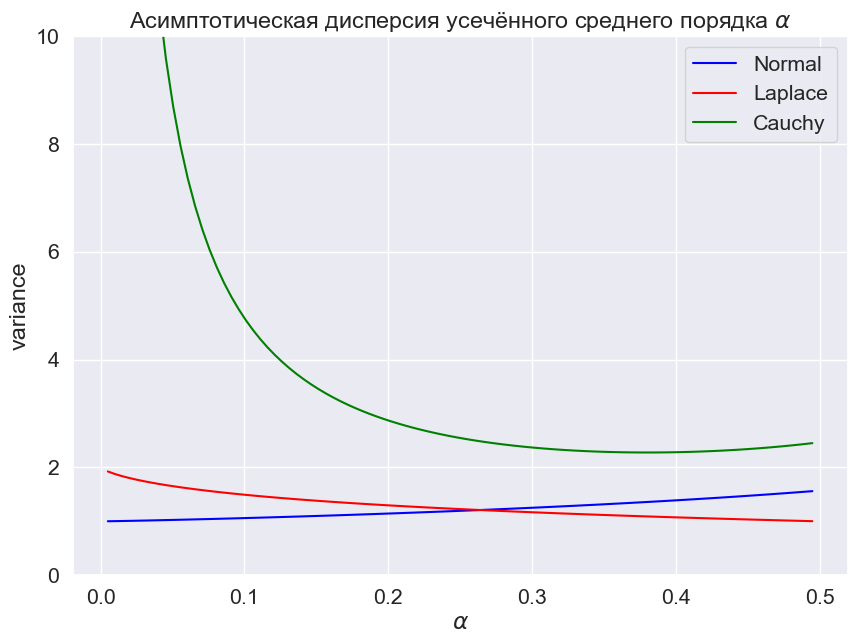

In [11]:
import warnings
warnings.filterwarnings('ignore')

alpha_grid = np.linspace(0, 0.5, 100)

distributions_names = ["Normal", "Laplace", "Cauchy"]
distributions = [sps.norm, sps.laplace, sps.cauchy]
colors = [norm_col, lap_col, cau_col]

plt.figure(figsize=(10, 7))
for d in range(len(distributions_names)):
    plt.plot(alpha_grid, asymptotic_variance(distributions[d], alpha_grid), color=colors[d], label=distributions_names[d])
    plt.ylim(0, 10)
    plt.xlabel('$\\alpha$')
    plt.ylabel('variance')
    plt.title("Асимптотическая дисперсия усечённого среднего порядка $\\alpha$")
    plt.legend(loc='upper right')
plt.show()

Как видим, с ростом $\alpha$ дисперсия усечённого среднего порядка $\alpha$ уменьшается для распределений Лапласа и Коши, а для нормального распределения, напротив, возрастает.
В случае распределения Коши наблюдаем зависимость похожую на $y = \dfrac{1}{C_1x} + C_2$.
В случае нормального распределения и распределения Лапласа наблюдаем зависимость похожую на линейную (с положительным и отрицательным коэффициентами наклона соответственно).  

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на разных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретическими

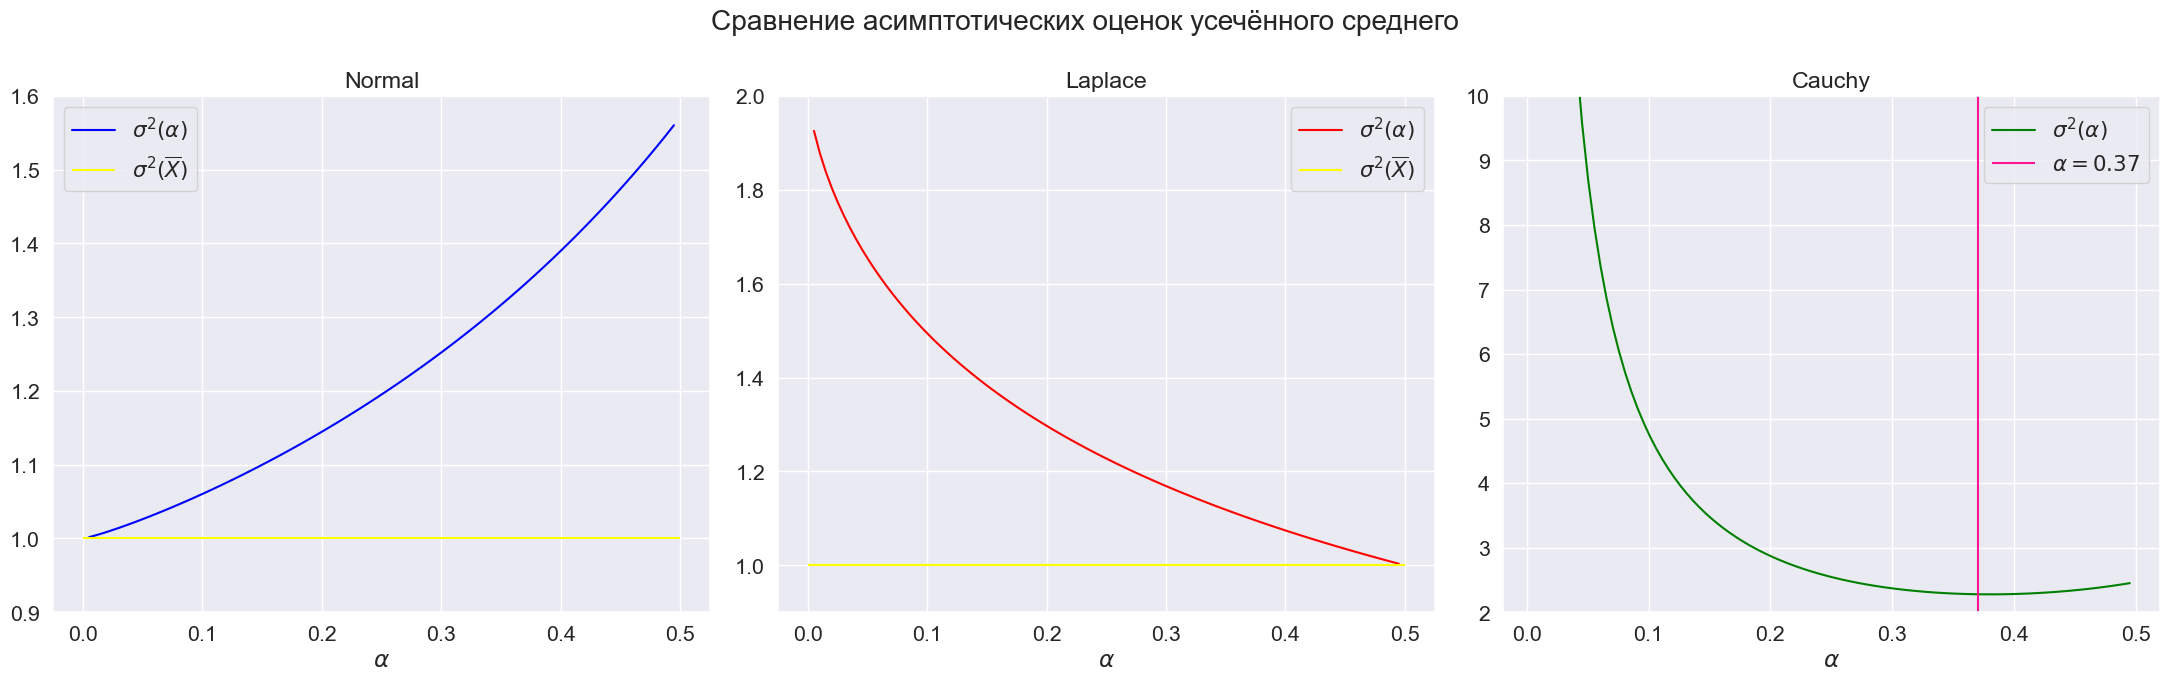

In [12]:
ylims_up = [1.6, 2, 10]
ylims_down = [0.9, 0.9, 2]
variances = [sigma, sigma**2, np.inf]

fig = plt.figure(figsize=(22, 7))
fig.suptitle("Сравнение асимптотических оценок усечённого среднего")
t = 1

for d in range(len(distributions_names)):
    distribution_name = distributions_names[d]
    color = colors[d]
    ax = fig.add_subplot(1, 3, t) # plot with 2 rows and 2 columns
    t += 1
    plt.plot(alpha_grid, asymptotic_variance(distributions[d], alpha_grid), color=colors[d], label='$\sigma^2(\\alpha)$')
    if distribution_name == "Cauchy":  
        plt.vlines(0.37, 2, 10, label='$\\alpha = 0.37$', color='deeppink')
    else:
        plt.hlines(variances[d], 0, 0.5, label='$\sigma^2(\overline{X})$', color='yellow')
    ax.set_ylim(ylims_down[d], ylims_up[d])
    ax.set_title(distribution_name)
    ax.set_xlabel('$\\alpha$')
    ax.legend()
    

# add spacing between subplots
fig.tight_layout()
plt.show()

Видим, что для нормального распределения с ростом $\alpha$ дисперсия усечённого среднего $\theta^*=\overline{X}_{trunc}$ монотонно возрастает и всё сильнее отклоняется от асимптотической дисперсии оценки $\theta^*=\overline{X}$.
Для распределения Лапласа, наоборот, с ростом $\alpha$ дисперсия усечённого среднего $\theta^*=\overline{X}_{trunc}$ монотонно убывает и всё сильнее приближается к асимптотической дисперсии оценки $\theta^*=\overline{X}$.
Касательно распределения Коши, мы можем только судить, что с ростом $\alpha$ дисперсия усечённого среднего $\theta^*=\overline{X}_{trunc}$ обозрима (в отличие от теоретической) и монотонно убывает, а затем вновь монотонно возрастает, имея точку минимума примерно в $\alpha=0.37$.


6) Breakdown point в статистике называется такое наибольшее число x от 0 до 100, что если изменить x% значений выборки, то значение оценки не потеряет в точности. Эквивалентно, если заменить хотя бы x+1% значений, можно получить сколь угодно плохую оценку.

Предположите, как Breakdown point зависит параметра $\alpha$.

Ответ:

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных x% выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

7) Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [13]:
def cummean(sample):
    means = sample.cumsum() / range(1, len(sample) + 1)
    return means

def cummedian(sample):
    medians = []
    for k in range(2, N):
        medians.append(np.median(sample[:k]))
    return medians

def cumtruncmean(sample, alpha=0.35):
    trunc_means = []
    for k in range(2, N):
        trunc_means.append(truncated_mean(sample[:k], alpha))
    return trunc_means

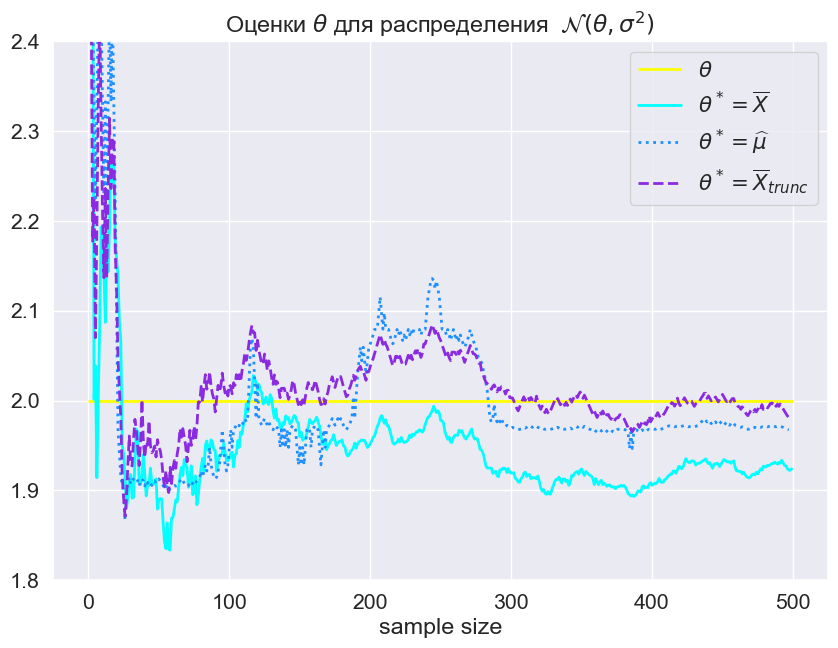

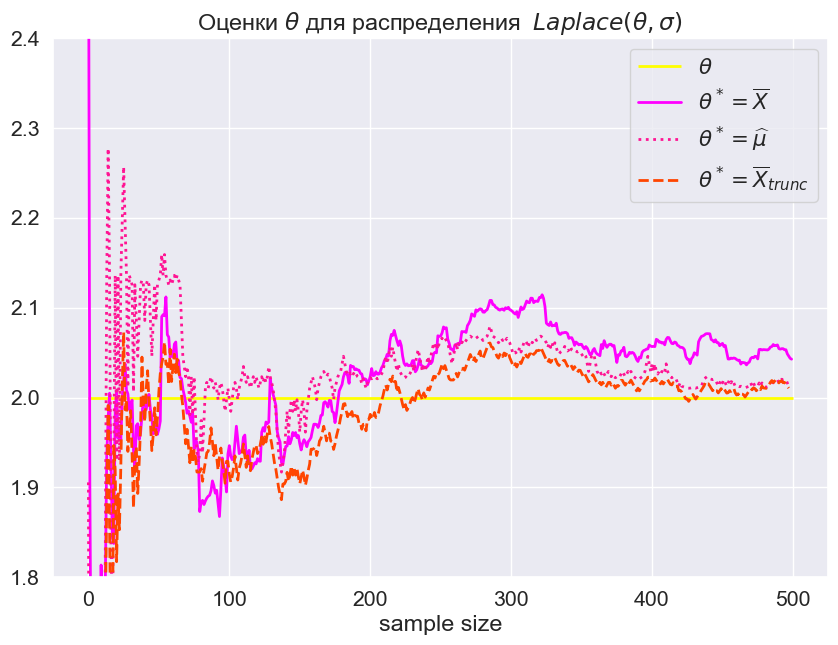

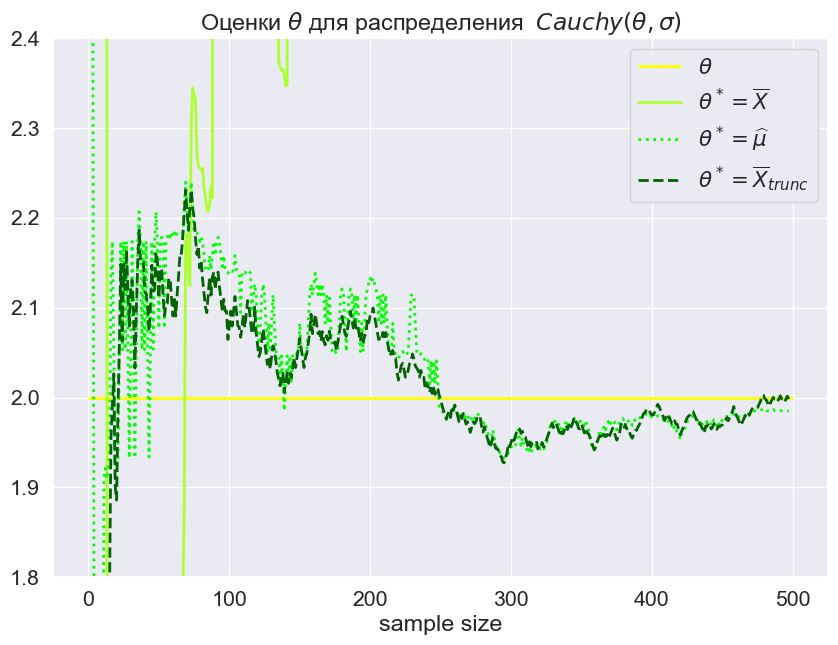

In [14]:
distributions_names = ["$\mathcal{N}(\\theta, \sigma^2)$ ", "$Laplace(\\theta, \sigma)$ ", "$Cauchy(\\theta, \sigma)$"]
colors = [norm_col, lap_col, cau_col]
samples = [norm_sample, laplace_sample, cauchy_sample]

new_colors = [['aqua', 'dodgerblue', 'blueviolet'], 
              ['fuchsia', 'deeppink', 'orangered'],
              ['greenyellow', 'lime', 'darkgreen']]

linwidth = 2

for d in range(len(distributions_names)):
    distribution_name = distributions_names[d]
    sample = samples[d]
    fig = plt.figure(figsize=(10, 7))
    plt.hlines(theta, 0, 500, color='yellow', linewidth=2, label='$\\theta$')
    i = 0
    plt.plot(cummean(sample), alpha=1, linewidth=linwidth, linestyle='-', color=new_colors[d][i], label='$\\theta^* = \overline{X}$')
    i += 1
    plt.plot(cummedian(sample), alpha=1, linewidth=linwidth, linestyle=':', color=new_colors[d][i], label='$\\theta^* = \widehat{\mu}$')
    i += 1
    plt.plot(cumtruncmean(sample, alpha=0.35), alpha=1, linewidth=linwidth, linestyle='--', color=new_colors[d][i], label='$\\theta^* = \overline{X}_{trunc}$')
    plt.xlabel('sample size')
    plt.ylim(1.8, 2.4)
    plt.title("Оценки $\\theta$ для распределения  " + distribution_name)
    plt.legend()
plt.show()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

Из графиков видим, что для нормального распределения и для Лапласа значения всех трёх оценок с ростом размера выборки мало отличаются от истинного значения и сложно выделить лучшую, но всё же видим подтверждение как теоретических данных, так и полученных из графиков асимптотической дисперсии для оценки $\theta^* = \overline{X}_{trunc}$. 
А именно, с ростом выборки лучшей оценкой для нормального распределения оказывается $\theta^* = \overline{X}$, а худшей - $\theta^* = \widehat{\mu}$.
 Для распределения Лапласа лучшей оценкой оказывается $\theta^* = \widehat{\mu}$, а худшей - $\theta^* = \overline{X}$.
 Для распределения Коши оценка $\theta^* = \overline{X}$, как и ожидалось, совершенно неприемлема, а вот $\theta^* = \widehat{\mu}$ и $\theta^* = \overline{X}_{trunc}$ обе хороши, но $\theta^* = \widehat{\mu}$ даже лучше.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}\l(\sum_{i=1}^n\rho(x_i - \theta)\r)$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее?

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $\l(\sum_{i=1}^n\psi(x_i - \theta)\r) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [15]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: D:\PyCharmProjects\Math_Stat\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 2.56MB/s]


In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("winequality-red.csv")

In [18]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [19]:
def alcohol_content(x):
    if x <= 10:
        return "low alcohol"
    if x > 12:
        return "high alcohol"
    return "medium alcohol"
    

data['category'] = (data['alcohol']).apply(alcohol_content)
data['category']

0          low alcohol
1          low alcohol
2          low alcohol
3          low alcohol
4          low alcohol
             ...      
1594    medium alcohol
1595    medium alcohol
1596    medium alcohol
1597    medium alcohol
1598    medium alcohol
Name: category, Length: 1599, dtype: object

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [20]:
mean = (data.groupby(by='category').mean()).rename(columns={'residual sugar': 'residual sugar mean'})['residual sugar mean']
median = (data.groupby(by='category').median()).rename(columns={'residual sugar': 'residual sugar median'})['residual sugar median']
sugar = pd.concat([mean, median], axis=1).sort_values(by='residual sugar median', ascending=False)
sugar

,residual sugar mean,residual sugar median
category,,
high alcohol,2.760993,2.3
medium alcohol,2.592264,2.2
low alcohol,2.445984,2.1


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**
Видим, что чем выше крепкость вина, тем больше доля остаточного сахара. Но в целом значения не сильно отличаются друг от друга.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

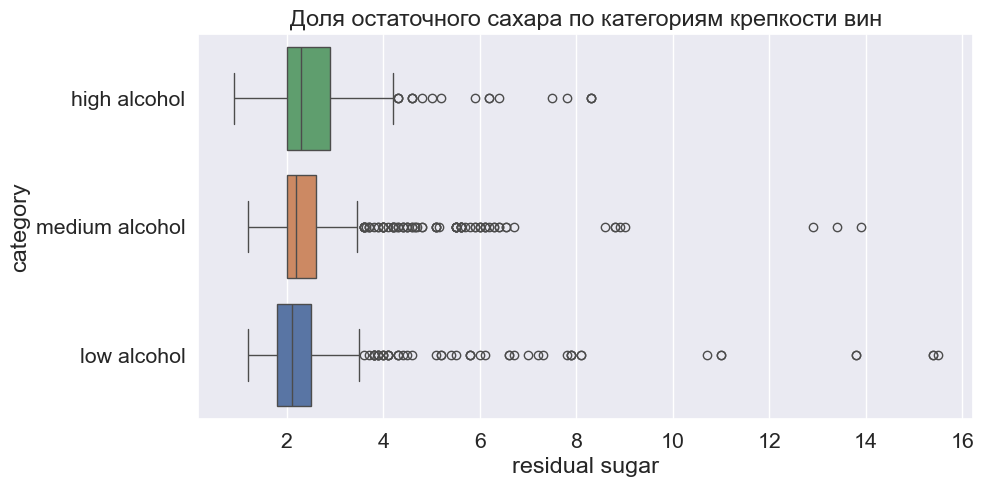

In [21]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='residual sugar', y='category', order=['high alcohol', 'medium alcohol', 'low alcohol'], hue='category', orient='h')
plt.title("Доля остаточного сахара по категориям крепкости вин")
plt.show()

Как соотносятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:**
Видим, что у вин средней и малой крепкости очень много выбросов правее доверительного интервала, что смещает как медиану, так и среднее в большую сторону. По понятным причинам среднее страдает от выбросов сильнее медианы:
 Выброс сильно вправо со значением $y$ смещает среднее $m$ для $n$ элементов до значения $\dfrac{mn+y}{n+1} \implies \l(\dfrac{mn+y}{n+1} - m\r) = \dfrac{y-m}{n+1}$ 
  В то время как медиана смещается совсем немного (конечно, если $n$ достаточно велико). 
  
Использовать будем оценку медианой $\theta^* = \widehat{\mu}$

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: Как мы видим, выбросов очень много и целесообразно использовать оценку медианой.

Для наглядности уберём выбросы с графика:

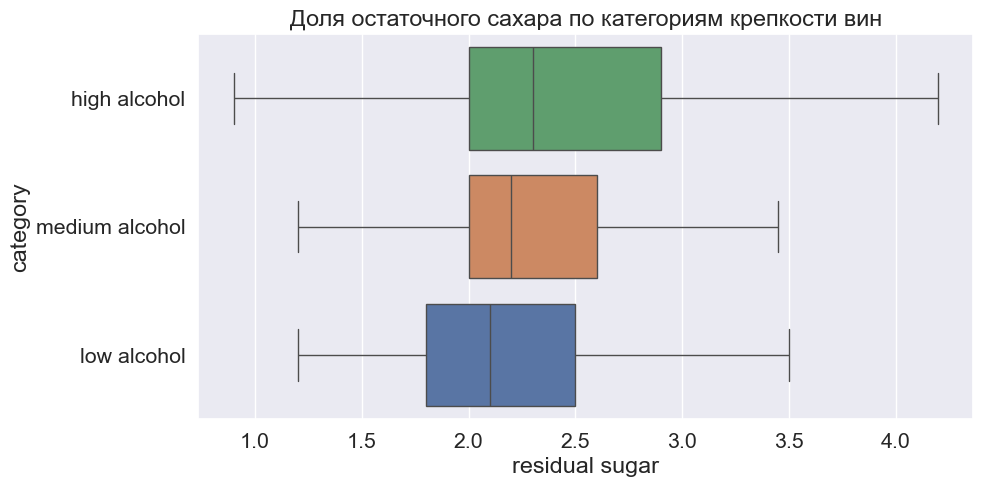

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='residual sugar', y='category', order=['high alcohol', 'medium alcohol', 'low alcohol'], hue='category', orient='h', showfliers=False)
plt.title("Доля остаточного сахара по категориям крепкости вин")
plt.show()

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

In [23]:
def boundary_qualities(x):
    return (x - 3)*(x - 8) == 0

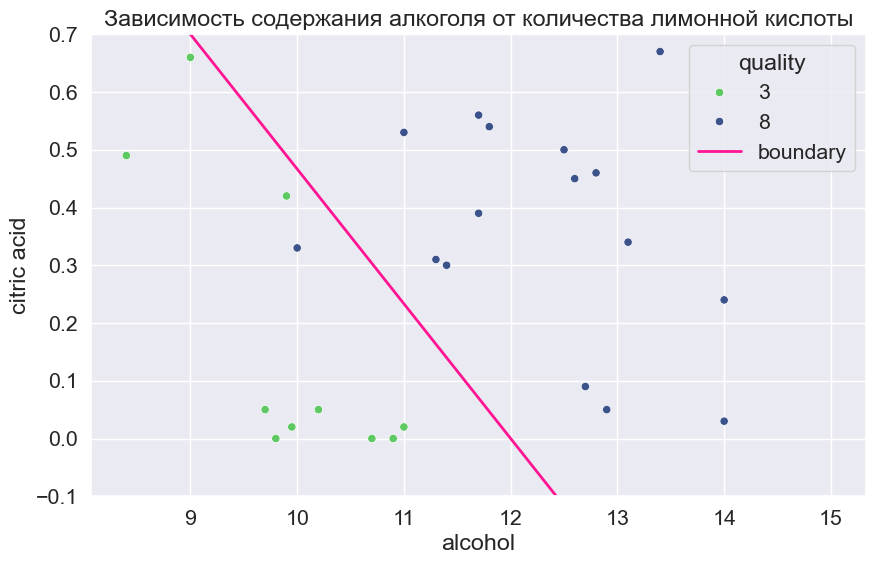

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data[data['quality'].apply(boundary_qualities)], x='alcohol', y='citric acid', hue='quality', palette=[palette[0]]+[palette[-1]])
max_alc = int(np.ceil(np.max(data['alcohol'])))
min_alc = int(np.ceil(np.min(data['alcohol'])))
x = np.linspace(min_alc, max_alc, 100)
k = -7/30
b = 2.8
y = x*k + b
plt.plot(x, y, color='deeppink', label='boundary', linestyle='-', linewidth=2)
plt.ylim(-0.1,0.7)
plt.title("Зависимость содержания алкоголя от количества лимонной кислоты")
plt.legend(title='quality',loc='upper right')
plt.show()

Видим, что между низкосортными винами и обладателями высших похвал можно провести явную границу (не важно как, главное, видно, что они попадают в разные полуплоскости)

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $a$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

Знаем, что для многомерного нормального распределения ОМП даёт 
$$\widehat{a} = \overline{X}, \hspace{2cm} \widehat{\Sigma} = \dfrac{1}{n}\sum_{i=1}^n(X_i-\overline{X})(X_i-\overline{X})^T$$

In [25]:
from IPython.display import display, Latex


def likelihood_function(distribution, sample):
    return np.prod(distribution.pdf(sample))

# likelihood function for multidimensional normal distribution
def make_distribution(sample):
    sample_mean = np.mean(sample, axis=0)
    sample_cov = np.cov(sample, rowvar=False)
    #print('mean = ', sample_mean)
    #print('cov = \n', sample_cov)
    return sps.multivariate_normal(mean=sample_mean, cov=sample_cov)

print("Low quality wines")
low_quality_wines = np.array(data[data['quality'] == 3][['alcohol', 'citric acid']])
print("\t\t\t\tf(X1,...,Xn) = ", likelihood_function(make_distribution(low_quality_wines), low_quality_wines))
print("\nHigh quality wines")
high_quality_wines = np.array(data[data['quality'] == 8][['alcohol', 'citric acid']])
print("\t\t\t\tf(X1,...,Xn) = ", likelihood_function(make_distribution(high_quality_wines), high_quality_wines))

Low quality wines
				f(X1,...,Xn) =  0.0006779027231491855

High quality wines
				f(X1,...,Xn) =  1.5852974432578098e-10


Предложите свои робастные (устойчивые к выбросам) оценки параметров $a$, $\Sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Попробуем, в качестве эксперимента, оценить 
$$\widehat{a}=X_{\l(\lfloor\frac{n}{2}\rfloor\r)} \hspace{2cm} \widehat{\Sigma} = \dfrac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})(X_i-\overline{X})^T$$

In [26]:
def new_make_distribution(sample):
    sample_median = np.median(sample, axis=0)
    sample_cov = np.cov(sample, rowvar=False) * n / (n-1)
    #print('mean = ', sample_mean)
    #print('cov = \n', sample_cov)
    return sps.multivariate_normal(mean=sample_median, cov=sample_cov)


print("Low quality wines")
low_quality_wines = np.array(data[data['quality'] == 3][['alcohol', 'citric acid']])
print("\t\t\t\tf(X1,...,Xn) = ", likelihood_function(new_make_distribution(low_quality_wines), low_quality_wines))
print("\nHigh quality wines")
high_quality_wines = np.array(data[data['quality'] == 8][['alcohol', 'citric acid']])
print("\t\t\t\tf(X1,...,Xn) = ", likelihood_function(new_make_distribution(high_quality_wines), high_quality_wines))

Low quality wines
				f(X1,...,Xn) =  2.1040462750321272e-05

High quality wines
				f(X1,...,Xn) =  6.561285016248165e-11


Как видим, значение функции правдоподобия немного уменьшилось. Новые оценки хуже в подходе ОМП.

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [27]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, в который истинное значение параметра попадает с высокой вероятностью.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Выборка $X_1, \ldots, X_n \sim U[0, \theta]$


### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Выборка $X_1, \ldots, X_n \sim Cauchy(\theta, 1) \hspace{2cm} \widehat{\theta} = \mu$
Мединана является асимптотически нормальной оценкой параметра сдвига для распределения Коши. Тогда
$$\sqrt{n}(\mu - \theta) \stackrel{d}{\to} \mathcal{N}\l(0, \dfrac{\pi^2}{4}\r)$$
То есть точный асимптотический доверительный интервал уровня доверия $\alpha$:
$$P_{\theta}\l(\mu - \dfrac{z_{\frac{1+\alpha}{2}}\pi}{2\sqrt{n}} < \theta <  \mu + \dfrac{z_{\frac{1+\alpha}{2}}\pi}{2\sqrt{n}} \r) \to \alpha$$

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Выборка $X_1, \ldots, X_n \sim Pois(\theta) \hspace{2cm} \widehat{\theta} = \overline{X}$
Из ЦПТ имеем
$$\sqrt{n} \cdot \dfrac{\overline{X} - \theta}{\theta} \stackrel{d}{\to} \mathcal{N}(0,1)$$
Оценка  $\widehat{\theta} = \overline{X}$ состоятельная, откуда точный асимптотический доверительный интервал уровня доверия $\alpha$:
$$P_{\theta}\l(\overline{X} - z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}} \hspace{0.3cm} < \hspace{0.3cm} \theta \hspace{0.3cm} < \hspace{0.3cm} \overline{X} + z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}}\ \r) \to \alpha$$

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Выборка $X_1, \ldots, X_n \sim \Gamma(\theta, \lambda) \hspace{1cm} \theta$ известно
Знаем, что $$n\overline{X} = \sum_{i=1}^n X_i \sim \Gamma\l(\sum_{i=1}^n \theta, \lambda\r) = \Gamma\l(n\theta, \lambda\r)$$
$$\dfrac{\overline{X}}{\lambda} \sim \Gamma\l(n\theta, 1\r)$$

Тогда точный доверительный интервал уровня доверия $\alpha$:
$$P_{\theta}\l(\dfrac{z_{\frac{1-\alpha}{2}}}{\sum X_i} < \lambda < \dfrac{z_{\frac{1+\alpha}{2}}}{\sum X_i} \r) = \alpha$$

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод:

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Итак, нам дана выборка $X_1, \ldots, X_n \sim \mathcal{N}(a, \sigma^2)$, где $\sigma$ неизвестна

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод:

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [28]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 



Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?